# Classification

In this notebook, we will see how the classification algorithms, which we have discussed in class, are applied in practice. As in the regression notebook, we will use the `scikit-learn` library to implement the algorithms and `pandas` to manage the data. For visualization, we will `seaborn` and `matplotlib` and for numerical operations, we will use `numpy`.

### Preparations

We start by importing the necessary libraries. 

In [1039]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1040]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Loading the data

We use [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/articles/intro.html) dataset. This dataset contains data on 344 penguins. The original data includes information on the species, island, bill length, bill depth, flipper length, body mass, sex and year. We have preprocessed the data, removing the missing values and encoding the species as a numerical variable. 0 corresponds to the Adelie species, 1 to the Chinstrap species and 2 to the Gentoo species. Furthermore, we have removed the coluns `island`, `sex` and `year` from the dataset.

Let's load the data and take a look at the first few rows.



In [1044]:
penguin_data = pd.read_csv('./data/penguins-numeric-all.csv', index_col=0)
penguin_data = penguin_data.sample(frac=1, random_state=42).reset_index(drop=True)
penguin_data.head(n=10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.5,16.7,178.0,3250.0
1,1,50.9,17.9,196.0,3675.0
2,0,42.1,19.1,195.0,4000.0
3,2,46.6,14.2,210.0,4850.0
4,0,41.1,18.2,192.0,4050.0
5,1,54.2,20.8,201.0,4300.0
6,1,50.3,20.0,197.0,3300.0
7,2,48.4,16.3,220.0,5400.0
8,2,49.5,16.2,229.0,5800.0
9,2,45.1,14.4,210.0,4400.0


Let's start by visualizing the data using a pairplot. This plot shows the relationship between the variables in the dataset. The diagonal shows the distribution of each variable. The other plots show the relationship between two variables. The color of the points indicates the species of the penguin.

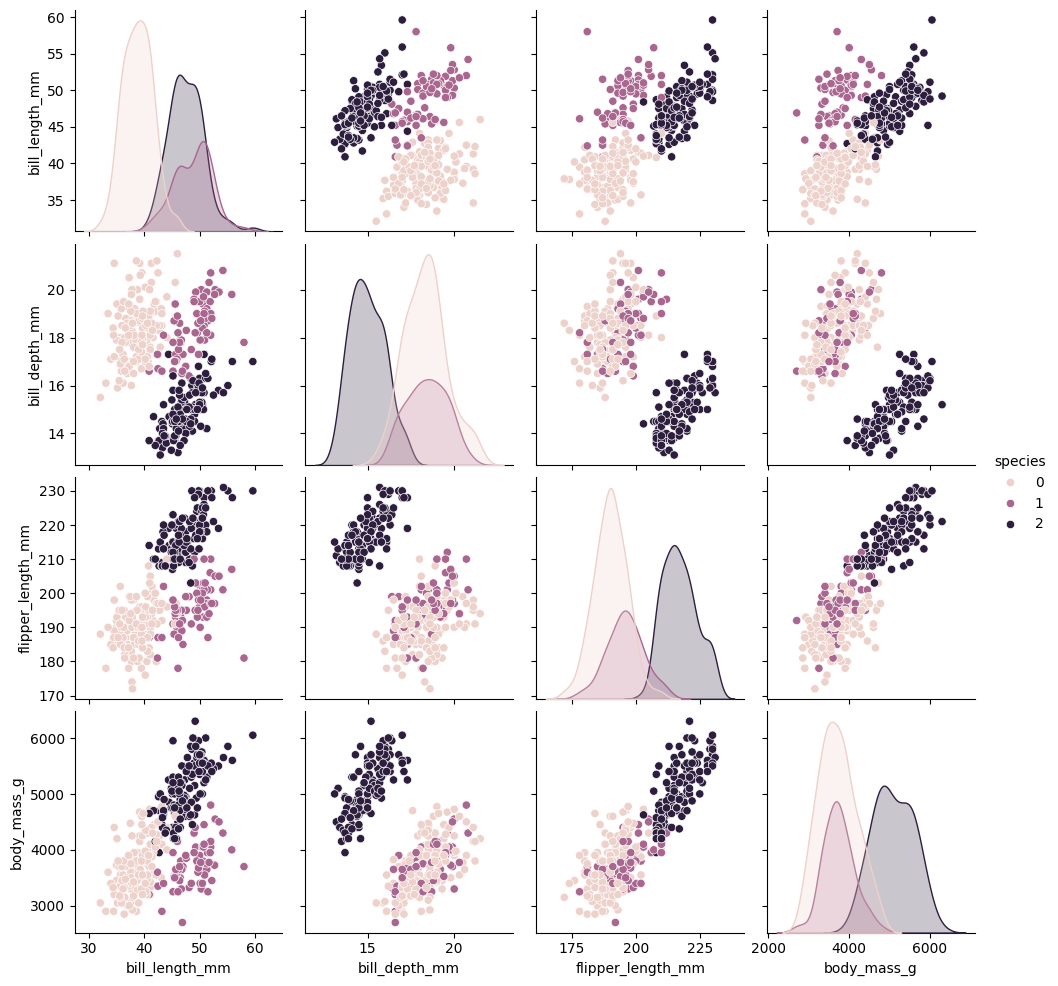

In [1045]:
sns.pairplot(data=penguin_data, hue="species")

- If you could only choose one feature to predict the target, which one would you choose?
- If you could only choose two features to predict the target, which two would you choose?

### Preparing the data

Before applying the classification algorithm, we remove the target variable `species` from the dataset and store it in a variable `y`. The remaining variables are stored in a variable `X`.

We can also see from the pairplot that the variables are in different scales. This can be a problem for some algorithms. To solve this problem, we will standardize the variables. This means that we will subtract the mean of each variable and divide by the standard deviation. This way, all variables will have mean 0 and standard deviation 1. This is done using the `StandardScaler` class from `scikit-learn`.

In [1046]:
y = penguin_data["species"]
x = penguin_data.drop(columns="species")

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns, index=x.index)


### Training a logistic regression model

Let's start with one feature first. We will use the `bill_length_mm` feature to predict the target.

In [1047]:
# to add more featuers, just add them to this list, e.g. ["bill_length_mm", "bill_depth_mm", ...]
features = ["bill_length_mm"] 

model = LogisticRegression(multi_class="multinomial", max_iter=10000)

model.fit(x_scaled[features], y)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [1048]:
y_pred = model.predict(x_scaled[features])

We compute the accuracy. The accuracy is the ratio of the number of correctly classified examples and the total number of examples.

In [1049]:

accuracy = accuracy_score(y_pred, y)
print(f"accuracy on training set = {accuracy}")

accuracy on training set = 0.7567567567567568


We see that the accuracy is not great. To understand what kind of errors the model is making, we can compute the confusion matrix. The confusion matrix shows the number of true positives, true negatives, false positives and false negatives.

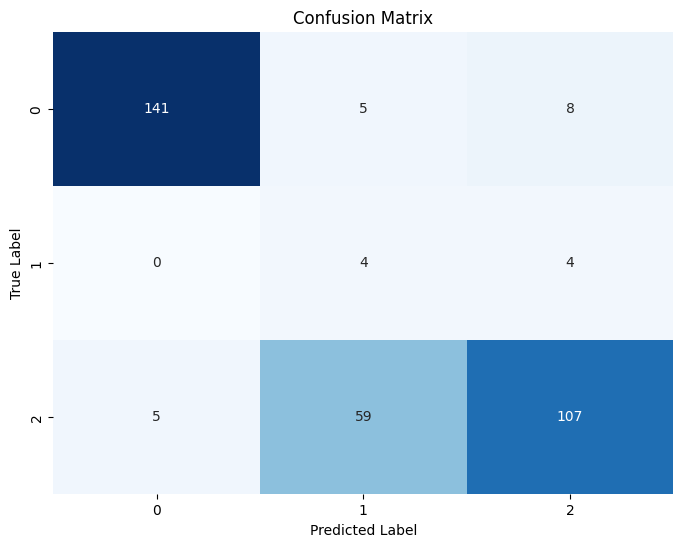

In [1050]:
# show the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y)

# Step 2: Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Exercises 

* We see that species 1 is often confused with species 2. Can you explain why this is the case?
  * Can you find a feature that better discriminates between species 1 and 2?
* Now add a second feature to the model. Which features would you choose? Repeat the training and compare the results.
* What is the accuracy of the model when using all features? 

Let's now look at the coefficients of the model. The coefficients tell us how much each feature contributes to the prediction. We retrain the model using all features and print the coefficients.

In [1051]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
model.fit(x_scaled[features], y)

LogisticRegression(max_iter=10000, multi_class='multinomial')

[-2.71655239  1.52495803 -0.48637203  0.37623263]
[-2.71655239  1.52495803 -0.48637203  0.37623263]


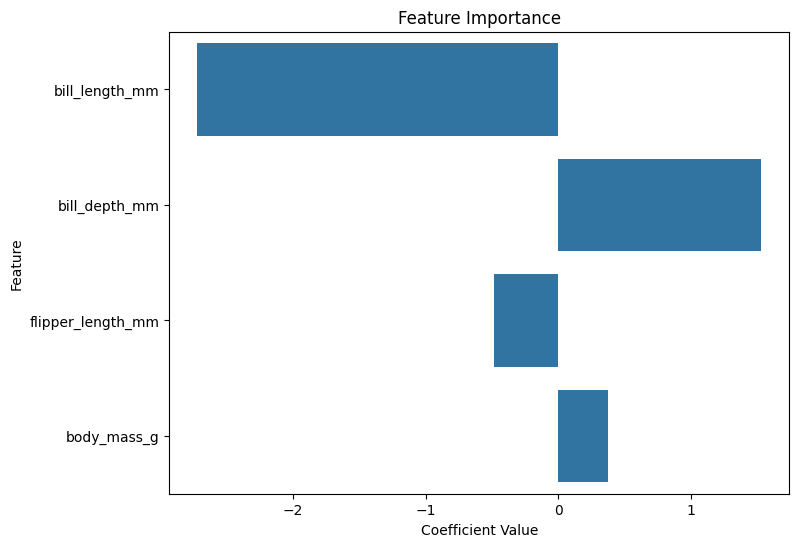

In [1052]:
# we create a bar plot with the coefficients of the logistic regression model
coefs = model.coef_[0]
print(coefs)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefs, y=features)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
print(coefs)


#### Exercise

- What can you say about the coefficients of the model? Which features are more important for the prediction?
- What would happen if we removed the feature with the smallest coefficient? 
- What would happen if we removed the feature with the largest coefficient? 

### Uncertainty

The logistic regression model gives us a probability that the example belongs to each class. 
In sci-kit learn, we can obtain these probabilities using the `predict_proba` method. We restrict ourselves to two features for visualization purposes.

In [1053]:
features = ["bill_length_mm", "bill_depth_mm"]
model.fit(x_scaled[features], y)
probs = model.predict_proba(x_scaled[features])

The probs variable contains the probabilities that each example belongs to each class. It is a matrix with 3 columns (for the 3 classes) and one row for each example:

In [1054]:
probs.shape

(333, 3)

We can visualize the probabilities using a scatter plot. We plot the probability of the example belonging to class 0 on the x-axis and the probability of the example belonging to class 1 on the y-axis. The size of the points indicates how likely it is that the example belongs to the given class. The color of the points indicates the true class of the example.

,species,proba_0,proba_1,proba_2
0,0,0.907569,0.071968,0.020464
1,1,0.003818,0.841913,0.154269
2,0,0.914446,0.085324,0.000230
3,2,0.000032,0.004372,0.995596
4,0,0.919606,0.079174,0.001220
5,1,0.003281,0.996042,0.000676
6,1,0.035371,0.962878,0.001751
7,2,0.002016,0.219779,0.778205
8,2,0.000565,0.156422,0.843013
9,2,0.000242,0.008843,0.990915


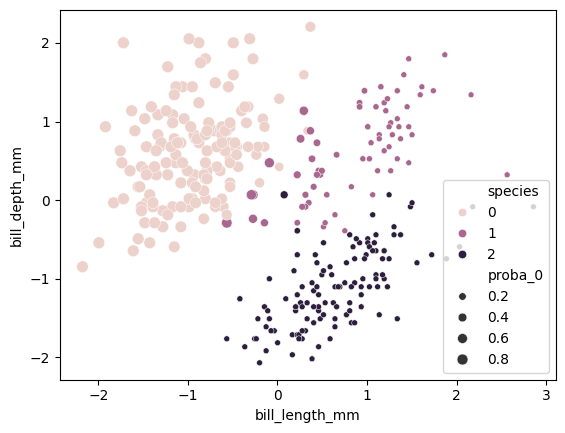

In [1055]:
probsdf = pd.DataFrame({"species": y, "proba_0": probs[:, 0], "proba_1": probs[:, 1], "proba_2": probs[:, 2]})
vis_df = pd.concat([x_scaled, probsdf], axis=1)
sns.scatterplot(data=vis_df, x=features[0], y=features[1], hue="species", size="proba_0")
probsdf.head(n=10)

#### Exercise

- Can you explain why the model is uncertain about some examples?
- What can you say about the examples that are far from the decision boundary?
- How does the plot look like for the other classes?
- How would the plot look like if we used a different pair of features?


## A proper workflow for training and evaluating a classifier 

### Training workflow

So far we have always used the same data to train and test our model. This is not a good idea. We should always split our data into a training, validation and a test set. As the dataset is relatively small, and logistic regression does not have many hyperparameters, we will not use an explicit validation set, but we will use cross-validation to estimate the performance of the model.

In [1108]:
from sklearn.model_selection import train_test_split

In [1109]:
seed = 42

# split in train validation and test set
train_data, test_data = train_test_split(penguin_data, test_size=0.3, random_state=seed, stratify=penguin_data["species"])

y_train = train_data["species"]
x_train = train_data.drop(columns="species")
y_test = test_data["species"]
x_test = test_data.drop(columns="species")

As before, we scale the features in order to remove the scale effect. 

In [1110]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

We restrict ourselves to two features for the rest of the notebook. This simplifies visualization and allows us later on to plot the decision boundary of the model.

C:\Users\marce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,fit_time,score_time,test_accuracy,test_balanced_accuracy,test_precision_macro,test_recall_macro
0,0.004519,0.017232,0.808511,0.700000,0.896552,0.700000
1,0.007553,0.016147,0.765957,0.634921,0.559524,0.634921
2,0.004460,0.014973,0.851064,0.761905,0.839744,0.761905
3,0.008027,0.008001,0.847826,0.766667,0.913580,0.766667
4,0.008000,0.012868,0.782609,0.666667,0.555556,0.666667


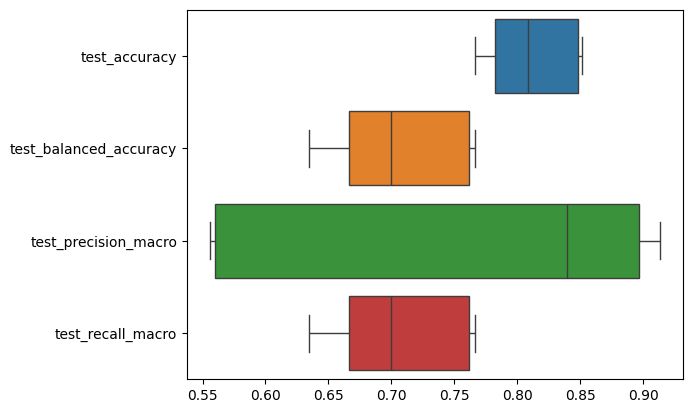

In [1111]:
# use cross validation to evalate the models performance
from sklearn.model_selection import cross_validate, StratifiedKFold

features = ["flipper_length_mm", "bill_depth_mm"]

model = LogisticRegression(max_iter=10000, C=0.1)
skf = StratifiedKFold(n_splits=5)
cv_results = cross_validate(model, x_train_scaled[features], y_train, cv=skf, scoring=["accuracy", "balanced_accuracy", "precision_macro", "recall_macro"])

cv_results_df = pd.DataFrame(cv_results)
sns.boxplot(data=cv_results_df.drop(columns=["fit_time", "score_time"]), orient="h")
cv_results_df

#### Exercise

- Experiment with the different features. Which two features would you choose to train the model?
- How do you interpret the metrics? Is your model performing well?

Now we evaluate the metrics on the test set. 

In [1112]:
LogisticRegression( max_iter=10000)
model.fit(x_train_scaled[features], y_train)
y_pred_test = model.predict(x_test_scaled[features])

print(f"accuracy on test set = {accuracy_score(y_test, y_pred_test)}")
print(f"balanced accuracy on test set = {balanced_accuracy_score(y_test, y_pred_test)}")
print(f"precision on test set = {precision_score(y_test, y_pred_test, average='macro')}")
print(f"recall on test set = {recall_score(y_test, y_pred_test, average='macro')}")


accuracy on test set = 0.81
balanced accuracy on test set = 0.6833333333333332
precision on test set = 0.8994708994708995
recall on test set = 0.6833333333333332


#### Exercise

- Is the performance on the test set what you would expect from the cross-validation results?

Next we investigate how the performance of the model changes when we adjust the threshold. We will plot the precision-recall curve. The precision is the ratio of the number of true positives and the number of examples classified as positive. The recall is the ratio of the number of true positives and the number of actual positives. The precision-recall curve shows the trade-off between precision and recall for different thresholds.


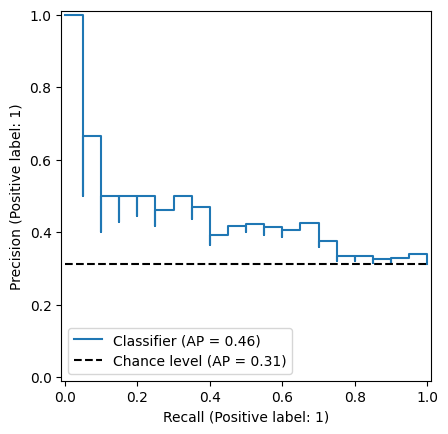

In [1113]:
y_pred_proba_test = model.predict_proba(x_test_scaled[features])[:,1]

PrecisionRecallDisplay.from_predictions(y_test[y_test != 2], y_pred_proba_test[y_test != 2], plot_chance_level=True)

For completeness, we also plot the ROC curve. The ROC curve shows the trade-off between the true positive rate and the false positive rate for different thresholds.

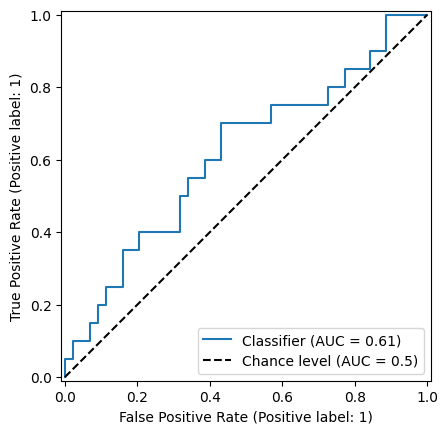

In [1114]:
RocCurveDisplay.from_predictions(y_test[y_test != 2], y_pred_proba_test[y_test != 2], plot_chance_level=True)

## Non-linear classifiers

In [1115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier

In [1116]:
seed = 42

# split in train validation and test set
train_data, test_data = train_test_split(penguin_data, test_size=0.3, random_state=seed, stratify=penguin_data["species"])

y_train = train_data["species"]
x_train = train_data.drop(columns="species")
y_test = test_data["species"]
x_test = test_data.drop(columns="species")

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

Logistic regression is a linear classifier. This means that it can only separate the classes using a straight line. We can illustrate this by plotting the decision boundary of the model. 

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

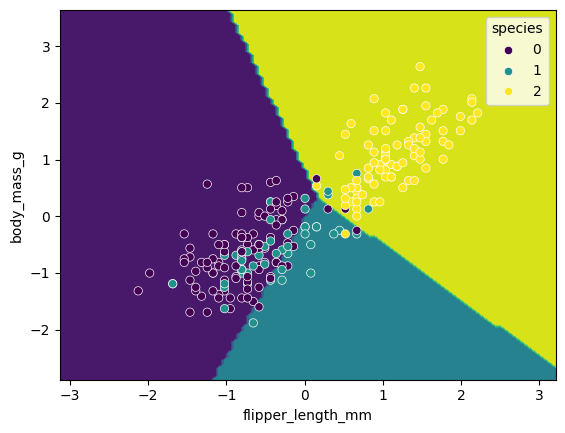

In [1117]:
from sklearn.inspection import DecisionBoundaryDisplay

features = ["flipper_length_mm", "body_mass_g"]

# plot the decision boundary\
model = LogisticRegression()
model.fit(x_train_scaled[features], y_train)

DecisionBoundaryDisplay.from_estimator(model, x_train_scaled[features], response_method="predict")

sns.scatterplot(x_train_scaled, x=features[0], y=features[1], hue=y_train, palette='viridis')

This is a restriction that might prevent the model from capturing the underlying structure of the data. We can overcome this limitation by using non-linear classifiers, such as KNN or decision trees.

Let's train a KNN classifier and plot the decision boundary.

C:\Users\marce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\inspection\_plot\decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


accuracy on training set = 0.9742489270386266


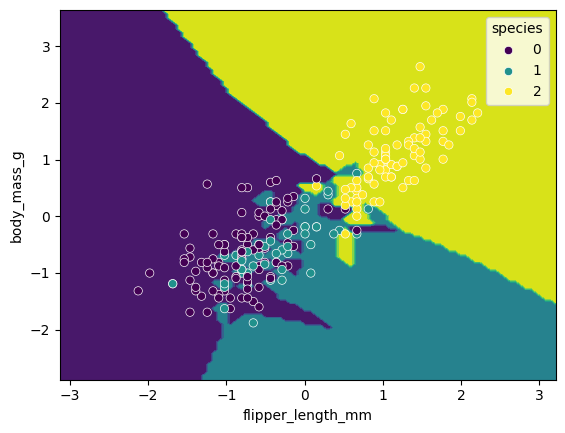

In [1118]:
from sklearn.inspection import DecisionBoundaryDisplay

# plot the decision boundary\
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train_scaled[features], y_train)

DecisionBoundaryDisplay.from_estimator(model, x_train_scaled[features], response_method="predict", title='Decision Boundary')
sns.scatterplot(x_train_scaled, x=features[0], y=features[1], hue=y_train, palette='viridis')

y_pred_train = model.predict(x_train_scaled[features])
print(f"accuracy on training set = {accuracy_score(y_pred_train, y_train)}")

We see that it classifies all the training data perfectly. Let's check using cross-validation if the model is also able to generalize to unseen data.

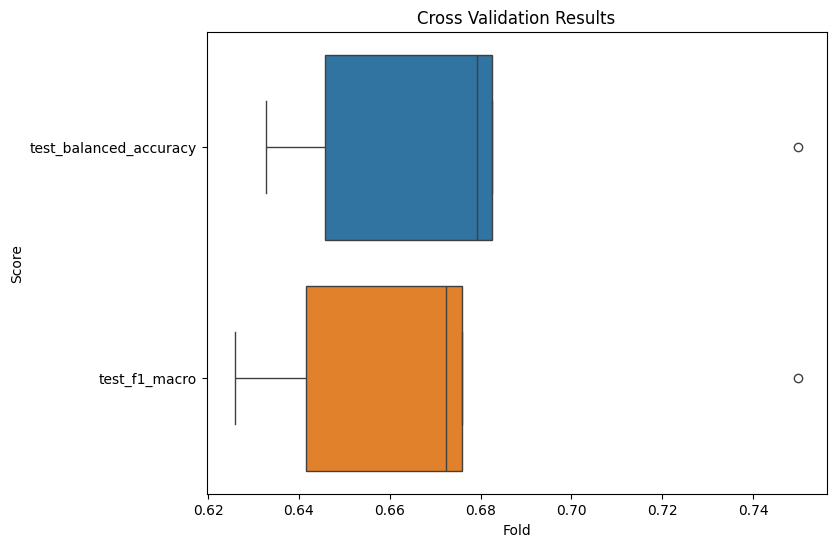

In [1119]:

model = KNeighborsClassifier(n_neighbors=1)
cv_results = cross_validate(model, x_train_scaled[features], y_train, cv=skf, scoring=["balanced_accuracy", "f1_macro"])


cv_results_df = pd.DataFrame(cv_results)

# create a pointplot to show the results
plt.figure(figsize=(8, 6))
sns.boxplot(data=cv_results_df.drop(columns = ["fit_time", "score_time"]), orient="h")
plt.ylabel("Score")
plt.xlabel("Fold")
plt.title("Cross Validation Results")
plt.show()


Clearly, the model is overfitting. This is because we are using a small number of neighbors. 

#### Exercise

- Experiment with the number of neighbors. What is the best number of neighbors?

We can find the best number of neighbors by using cross-validation. We will use the `GridSearchCV` class from `scikit-learn` to find the best hyperparameters.

In [1120]:
# perform grid search to find the best hyperparameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15]
}

model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=skf, scoring="balanced_accuracy")

grid_search.fit(x_train_scaled[features], y_train)
grid_search.best_params_

{'n_neighbors': 15}

Let's now train a decision tree classifier and plot the decision boundary.

In [1121]:

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train_scaled[features], y_train)


DecisionTreeClassifier(max_depth=3)

One of the advantages of decision trees is that they are easy to interpret. We can visualize the tree using the `plot_tree` function from `scikit-learn`. In order to clearly see what is happening, we restrict the depth of the tree to a small number. 

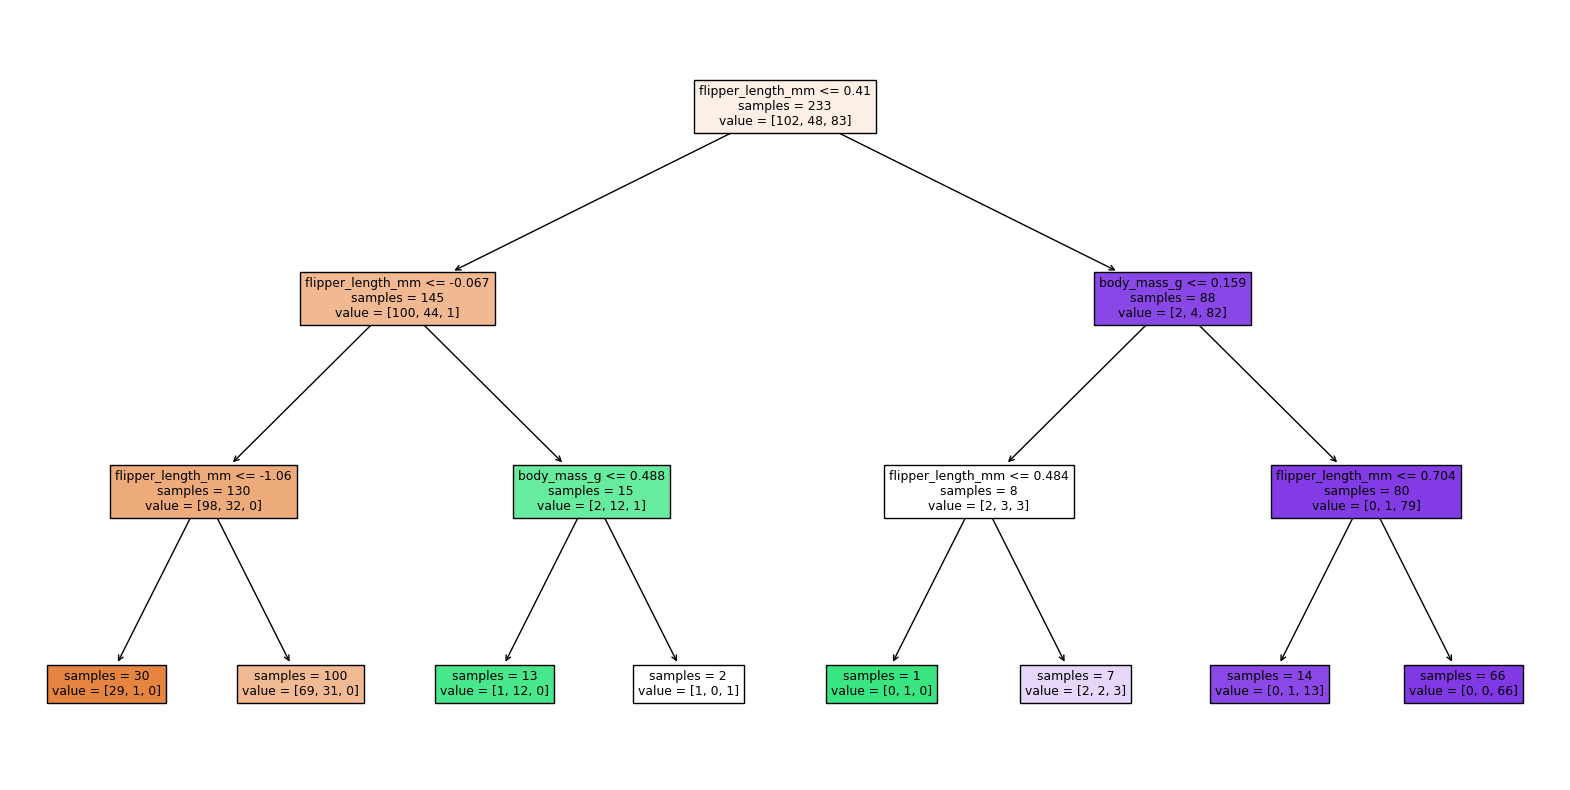

In [1122]:
# plot the decision tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train_scaled[features], y_train)
plt.figure(figsize=(20, 10))
dsp = plot_tree(model, feature_names=features, filled=True, impurity=False)


We also visualize the decision boundary of the model. 

C:\Users\marce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\inspection\_plot\decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'title'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

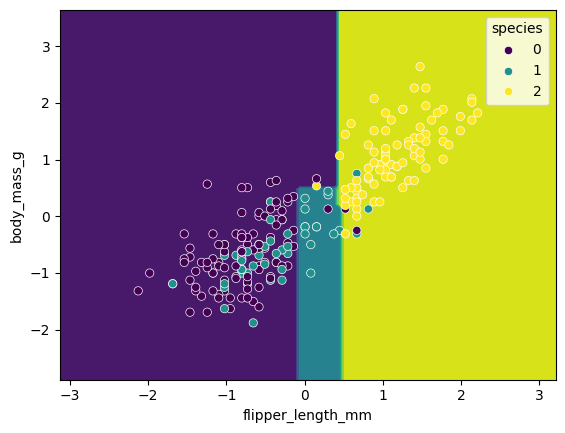

In [1123]:
DecisionBoundaryDisplay.from_estimator(model, x_train_scaled[features], response_method="predict", title='Decision Boundary')
sns.scatterplot(x_train_scaled, x=features[0], y=features[1], hue=y_train, palette='viridis')

#### Exercise

- Experiment with the depth of the tree. How does the depth influence the decision boundary?
- Can you see how the decisions in the tree are reflected in the decision boundary?


The question remains what the best depth of the tree is. We can use grid search to find the best hyperparameters, as we did for the KNN classifier.

#### Exercise

- Can you adapt the code above for KNN to find the best depth for the decision tree?